In [8]:
import pandas as pd
import matplotlib.pyplot as plt
backbone = "PlacesAlexnet" #
device = "cpu"#"cuda:0"# 
exit_type = "ConvDense"#"Dense2LayerTemp"#"Dense2Layer"#
# exits_path = f"./out_dir/{backbone}/exits_{device}.csv"
# model_path = f"./out_dir/{backbone}/model_{device}.csv"
trial = "009-places-1exit"
report_dir = f"./out_dir/{backbone}/reports/{exit_type}/{device}/{trial}"
exits_path = f"{report_dir}/exits.csv"
model_path = f"{report_dir}/model.csv"

exits_df = pd.read_csv(exits_path, index_col="Idx")
model_df = pd.read_csv(model_path, index_col="Idx")
# exits_df[exits_df["ExitNumber"] == 2]
exits_df.reset_index(inplace=True)
model_df.reset_index(inplace=True)

exits_df.drop_duplicates(subset=["Confidence", "ExitNumber"], inplace=True, ignore_index=True)
model_df.drop_duplicates(subset=["Confidence"], inplace=True, ignore_index=True)
exits_df[(exits_df["ExitNumber"]==1)]

,Idx,Confidence,ExitNumber,HitTime,HitRateOverAll,HitRate,Accuracy,CacheAccuracy,SamplesReached,BatchesReached
1,1,0.00,1.0,0.00,0.00,-1.0,-1.00,-1.0,0.0,0.0
3,3,0.02,1.0,0.00,0.00,-1.0,-1.00,-1.0,0.0,0.0
5,5,0.04,1.0,13.33,0.99,100.0,27.78,100.0,36.0,28.0
7,7,0.06,1.0,42.95,4.11,100.0,19.33,100.0,150.0,84.0
9,9,0.08,1.0,55.53,6.79,100.0,17.34,100.0,248.0,105.0
11,11,0.10,1.0,61.04,10.03,100.0,18.85,100.0,366.0,111.0
13,13,0.12,1.0,62.97,13.12,100.0,20.04,100.0,479.0,113.0
15,15,0.14,1.0,66.03,16.88,100.0,20.62,100.0,616.0,115.0
17,17,0.16,1.0,67.43,20.52,100.0,21.90,100.0,749.0,115.0
19,19,0.18,1.0,68.99,23.75,100.0,23.07,100.0,867.0,114.0


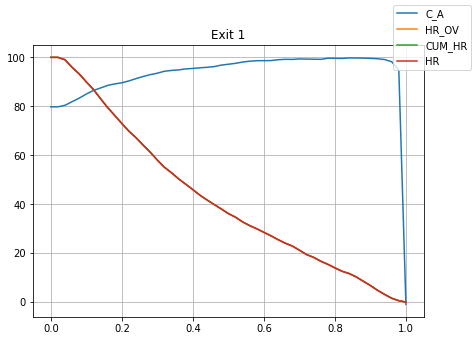

In [15]:
fig, axs = plt.subplots(1 ,figsize=(7,5))
axs = [axs]
for i in range(1):
    axs[i].title.set_text(f"Exit {i+1}")
    axs[i].grid()
    cum_hr = exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"].reset_index()
    for j in range(i):
        cum_hr += exits_df[exits_df["ExitNumber"]==j]["HitRateOverAll"].reset_index()
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["CacheAccuracy"], label="C_A")
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRateOverAll"], label="HR_OV")
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], cum_hr["HitRateOverAll"], label="CUM_HR")
    axs[i].plot(exits_df[exits_df["ExitNumber"] == i]["Confidence"], exits_df[exits_df["ExitNumber"]==i]["HitRate"], label="HR")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')


In [21]:
model_df

,Idx,Confidence,ResponseTime,CachedResponseTime,MTTR,CachedMTTR,Accuracy,CachedAccuracy,MTTRRatio,CacheAccuracy
0,0,0.00,1.6680,2.1026,0.0040,0.0013,30.17,26.78,31.78,30.45
1,1,0.02,1.5928,2.1016,0.0038,0.0013,30.17,26.77,32.70,30.35
2,2,0.04,1.5327,2.1239,0.0037,0.0013,30.17,26.81,33.97,30.70
3,3,0.06,1.5571,2.7098,0.0038,0.0015,30.17,26.92,40.86,30.85
4,4,0.08,1.5839,3.1192,0.0038,0.0022,30.17,27.45,57.96,32.64
5,5,0.10,1.6603,3.3574,0.0040,0.0030,30.17,27.86,75.61,35.23
6,6,0.12,1.5803,3.3553,0.0038,0.0037,30.17,28.42,96.67,38.83
7,7,0.14,1.5571,3.3814,0.0038,0.0043,30.17,28.81,114.33,43.27
8,8,0.16,1.5529,3.4216,0.0038,0.0048,30.17,29.04,127.60,48.35
9,9,0.18,1.5490,3.4686,0.0037,0.0052,30.17,29.24,138.62,52.96


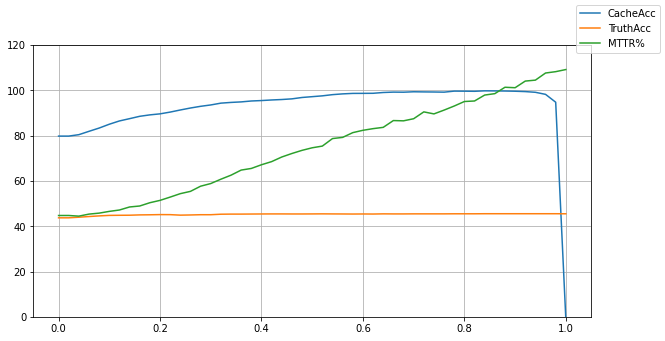

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(model_df["Confidence"], model_df["CacheAccuracy"], label="CacheAcc")
ax.plot(model_df["Confidence"], model_df["CachedAccuracy"], label="TruthAcc")
ax.plot(model_df["Confidence"], model_df["MTTRRatio"], label="MTTR%")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
# ax.set_yticks(range(0, 120, 10))
ax.set_ylim(0, 120)
ax.grid()

In [8]:
gpu_report_dir = f"./out_dir/{backbone}/reports/{exit_type}/cuda:0/{trial}" #002-noshrink/"#
cpu_report_dir = f"./out_dir/{backbone}/reports/{exit_type}/cpu/{trial}/"
model_gpu_path = f"{gpu_report_dir}/model.csv"
model_cpu_path = f"{cpu_report_dir}/model.csv"

model_gpu_df = pd.read_csv(model_gpu_path, index_col="Idx")
model_cpu_df = pd.read_csv(model_cpu_path, index_col="Idx")

model_gpu_df.reset_index(inplace=True)
model_cpu_df.reset_index(inplace=True)

fig, ax = plt.subplots(3,sharex=True, figsize=(10,10))
ax[0].plot(model_gpu_df["Confidence"], model_gpu_df["MTTR"], label="MTTR", color="r")
ax[0].plot(model_gpu_df["Confidence"], model_gpu_df["CachedMTTR"], label="C-MTTR", color="g")
ax[1].plot(model_cpu_df["Confidence"], model_cpu_df["MTTR"], label="MTTR", color="r")
ax[1].plot(model_cpu_df["Confidence"], model_cpu_df["CachedMTTR"], label="C-MTTR", color="g")
ax[2].plot(model_cpu_df["Confidence"], model_cpu_df["CachedAccuracy"], label="Acc", color="b")
for i in range(3):
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 1.05))
    ax[i].grid()
    ax[i].set_ylabel("sec")
    
ax[0].set_title("GPU")
ax[1].set_title("CPU")
ax[2].set_title("Acc%")
ax[2].set_ylabel("%")
ax[2].set_xlabel("Confidence")


FileNotFoundError: [Errno 2] No such file or directory: './out_dir/MobileFaceNet/reports/Dense2LayerTemp/cpu/006-temprature//model.csv'